<a href="https://colab.research.google.com/github/samygrandi/TelecomX_parte2/blob/main/TelecomX_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [11]:
import numpy as np

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("dados_tratados.csv")

In [29]:
if "id_cliente" in df.columns:
    df = df.drop(columns=["id_cliente"])

In [44]:
print("Dataset carregado ✔")
print("Shape:", df.shape)

Dataset carregado ✔
Shape: (7267, 22)


In [30]:
df["evasao"] = df["evasao"].map({
    "Yes":1,
    "No":0,
    "Sim":1,
    "Não":0
})

In [45]:
for col in df.columns:
    if "id" in col.lower():
        df = df.drop(columns=[col])
        print("Coluna removida:", col)

Coluna removida: id_cliente
Coluna removida: idoso


In [46]:
target_col = None

for col in df.columns:
    if "evas" in col.lower() or "churn" in col.lower():
        target_col = col

if target_col is None:
    raise ValueError("Nenhuma coluna de evasão encontrada")

print("Target identificada:", target_col)

Target identificada: evasao


In [47]:
df[target_col] = df[target_col].astype(str).str.lower().map({
    "yes":1, "sim":1, "1":1, "true":1,
    "no":0, "não":0, "nao":0, "0":0, "false":0
})

df = df.dropna(subset=[target_col])

In [48]:
categoricas = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=categoricas, drop_first=True)

In [49]:
y = df[target_col]
X = df.drop(columns=[target_col])

print("\nX shape:", X.shape)
print("y shape:", y.shape)


X shape: (7043, 30)
y shape: (7043,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Split concluído ✔")

Split concluído ✔


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

pred_log = log_model.predict(X_test_scaled)

print("\n===== LOGISTIC REGRESSION =====")
print("Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))


===== LOGISTIC REGRESSION =====
Accuracy: 0.795551348793185
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1552
         1.0       0.64      0.54      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1379  173]
 [ 259  302]]


In [53]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("\n===== RANDOM FOREST =====")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))


===== RANDOM FOREST =====
Accuracy: 0.7709417889256981
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1552
         1.0       0.59      0.46      0.52       561

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113

[[1369  183]
 [ 301  260]]


In [54]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nTop variáveis mais importantes:")
print(importances.sort_values(ascending=False).head(10))


Top variáveis mais importantes:
tempo_cliente                        0.341593
internet_fiber optic                 0.052962
metodo_pagamento_electronic check    0.045191
genero_male                          0.045083
tipo_contrato_two year               0.038872
fatura_digital                       0.037653
parceiro                             0.036980
suporte_tecnico_yes                  0.036445
tipo_contrato_one year               0.035405
seguranca_online_yes                 0.035209
dtype: float64


In [55]:
target = target_col

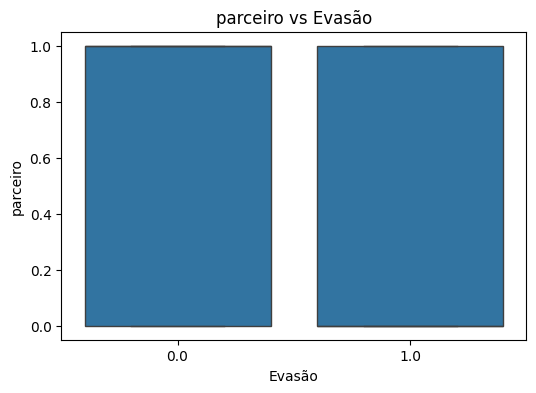

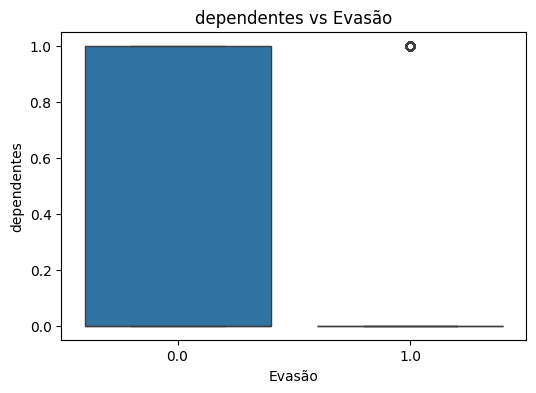

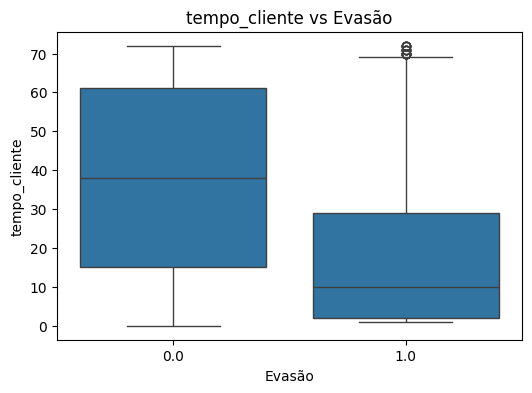

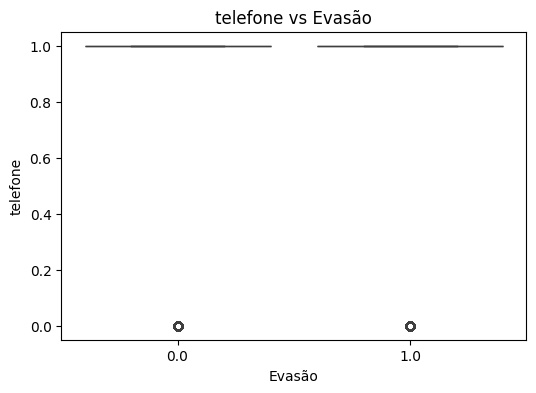

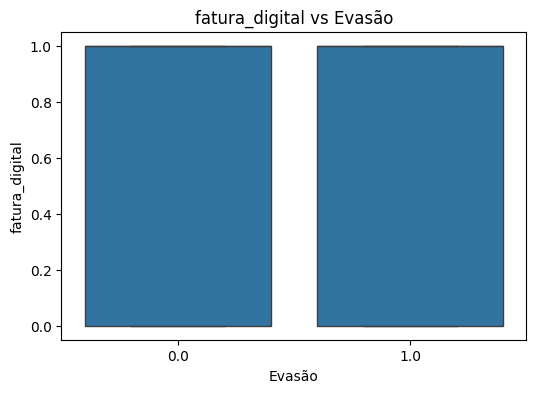

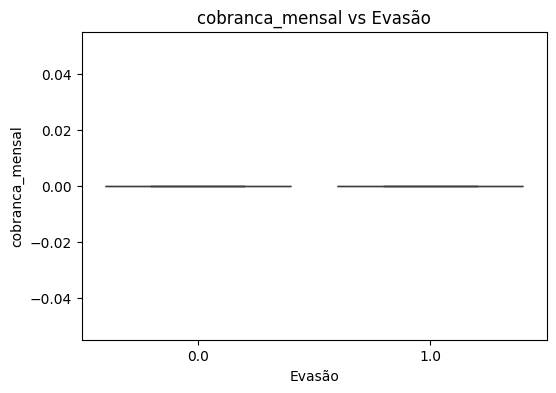

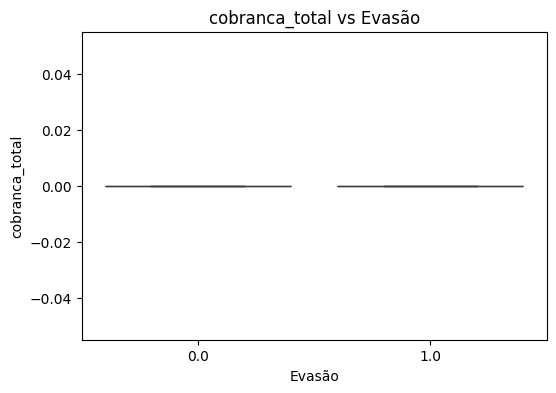

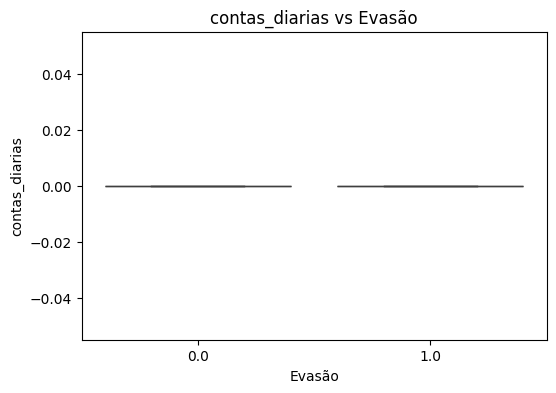

In [61]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs Evasão")
        plt.xlabel("Evasão")
        plt.ylabel(col)
        plt.show()

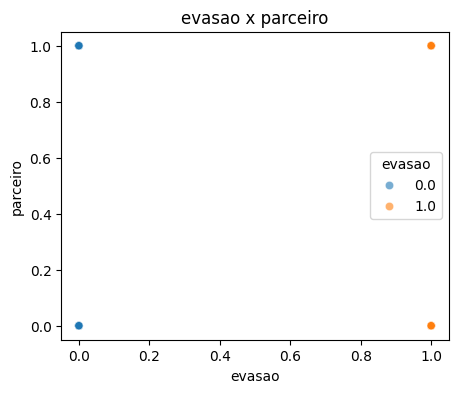

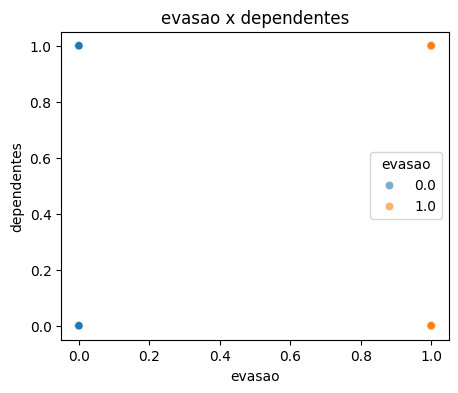

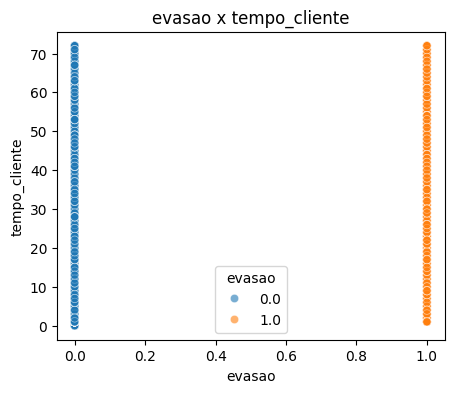

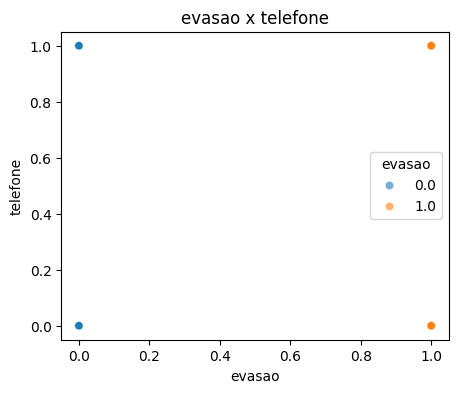

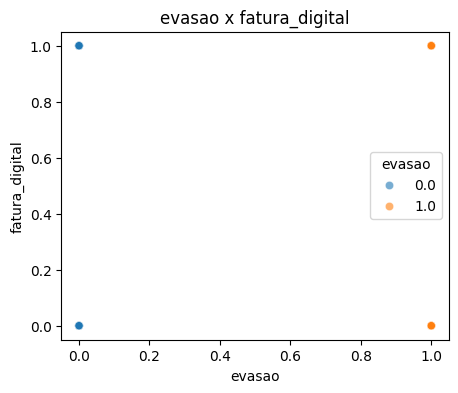

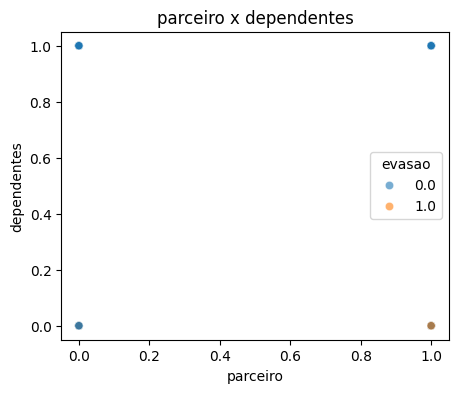

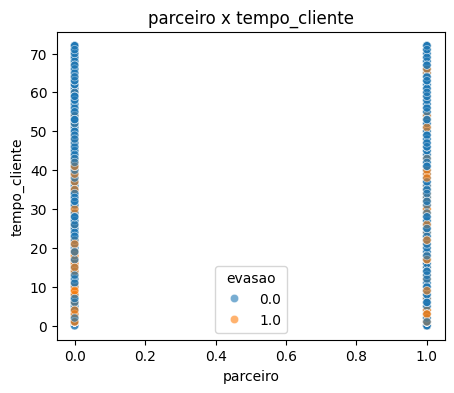

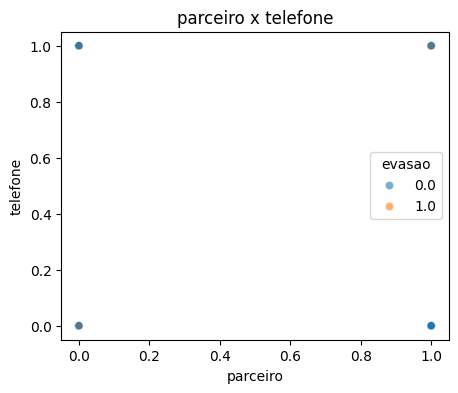

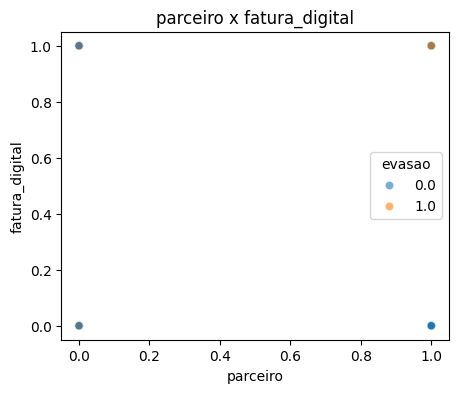

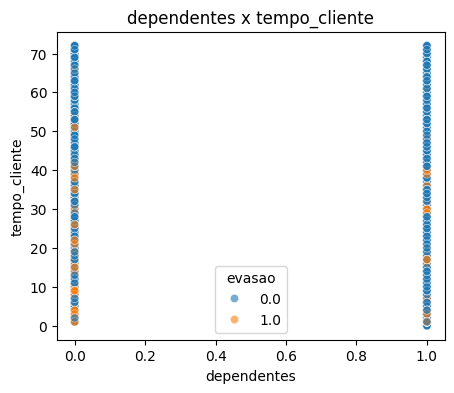

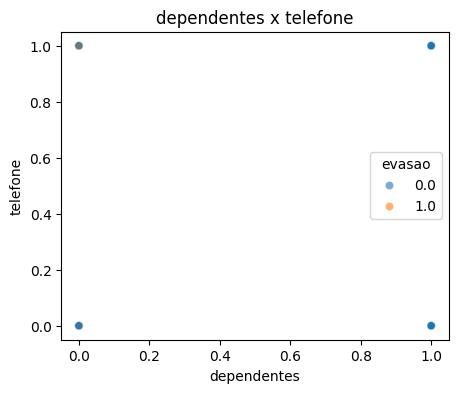

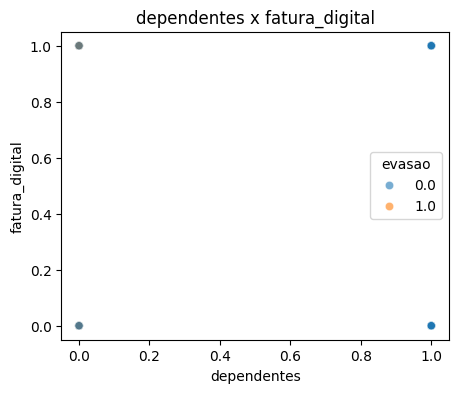

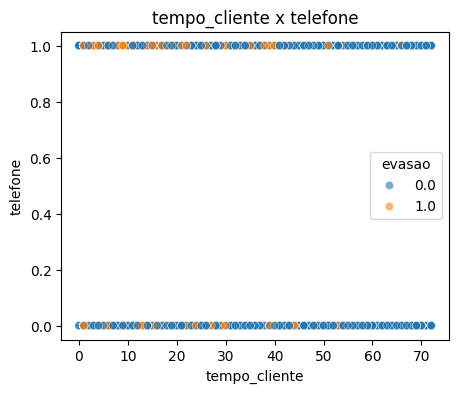

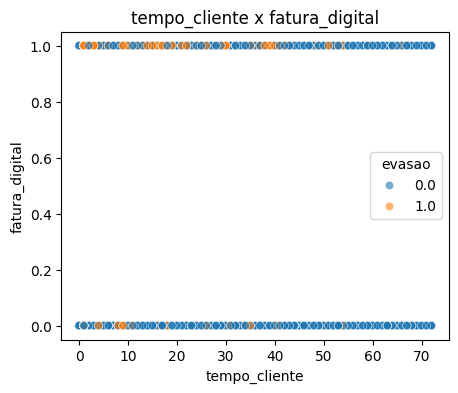

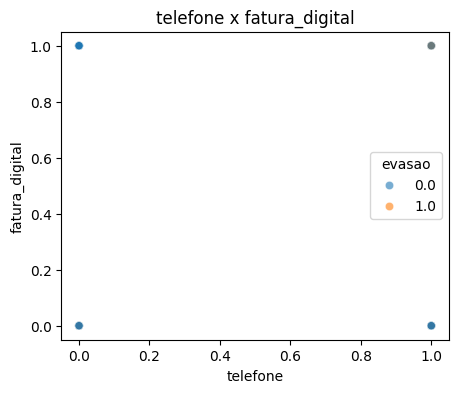

In [57]:
cols = list(num_cols)

# limitar quantidade para não gerar gráficos demais
cols = cols[:6]

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        plt.figure(figsize=(5,4))
        sns.scatterplot(
            x=df[cols[i]],
            y=df[cols[j]],
            hue=df[target],
            alpha=0.6
        )
        plt.title(f"{cols[i]} x {cols[j]}")
        plt.show()

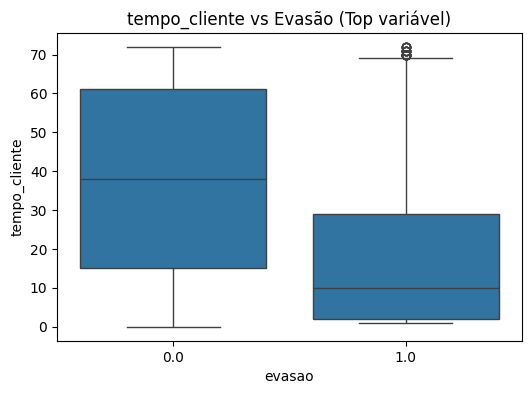

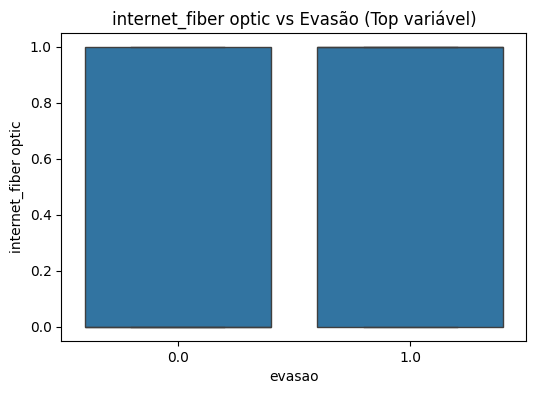

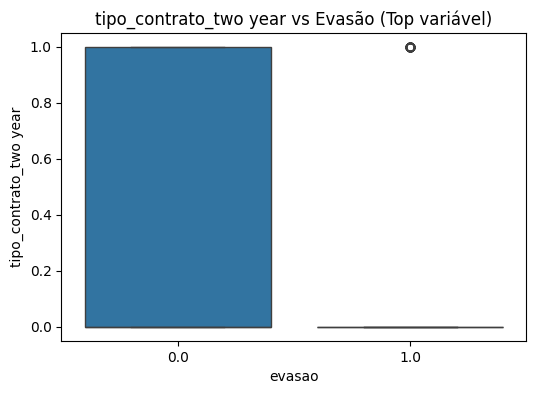

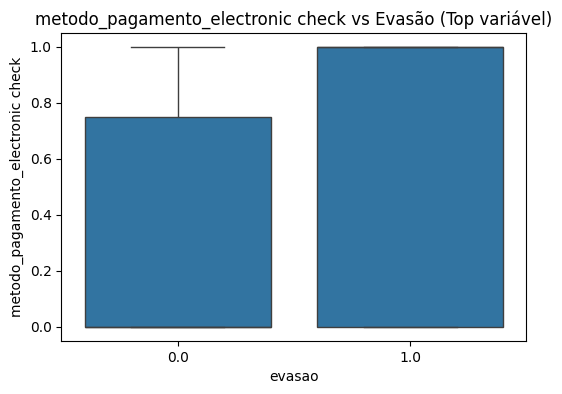

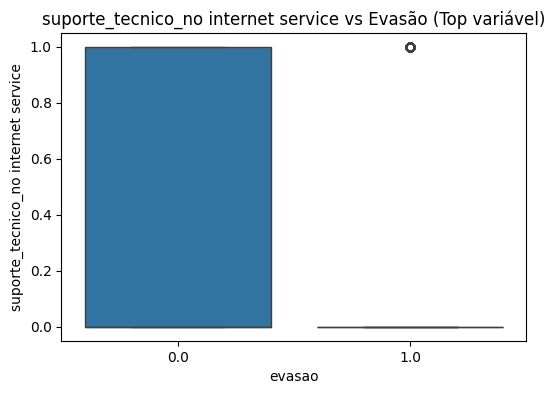

In [58]:
corr = df.corr()[target].abs().sort_values(ascending=False)
top = corr.index[1:6]

for col in top:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} vs Evasão (Top variável)")
    plt.show()

In [62]:
# Relatorio de Conclusao

#A análise exploratória evidenciou que o tempo de relacionamento é a variável mais relevante para prever evasão,
#com clientes recentes apresentando risco significativamente maior de cancelamento. Além disso, contratos de longa
#duração demonstraram forte efeito de retenção, enquanto a ausência de suporte técnico e o uso de pagamento
#eletrônico manual estiveram associados a maiores taxas de churn. Esses achados indicam que estratégias focadas
#nos primeiros meses do cliente podem gerar maior impacto na redução da evasão.